In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("datos/bikes_stand.csv", index_col=0)
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654
1,2018-01-02,winter,0,1,0,Tuesday,1,2,-0.425690,0.332722,0.687550,670
2,2018-01-03,winter,0,1,0,Wednesday,1,1,-0.949970,-0.900337,0.685210,1229
3,2018-01-04,winter,0,1,0,Thursday,1,1,-0.938563,-0.170632,-0.210435,1454
4,2018-01-05,winter,0,1,0,Friday,1,1,-0.853992,-0.901843,0.060294,1518


In [7]:
lista_categoricas = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [8]:
df_season = df.groupby('season')["registered"].mean().reset_index().sort_values(by = "registered")
df_season

,season,registered
3,winter,2271.983333
1,spring,3886.233696
0,autumn,3999.050562
2,summer,4441.691489


In [9]:
print(f'winter: 1')
print(f'autumn: {df_season.loc[0, "registered"]/df_season.loc[3, "registered"]}')
print(f'spring: {df_season.loc[1, "registered"]/df_season.loc[3, "registered"]}')
print(f'summer: {df_season.loc[2, "registered"]/df_season.loc[3, "registered"]}')

winter: 1
autumn: 1.7601584057091468
spring: 1.7105027306474554
summer: 1.9549841868096316


In [10]:
df_yr = df.groupby('yr')["registered"].mean().reset_index().sort_values(by = "registered")
df_yr

,yr,registered
0,0,2728.358904
1,1,4589.156164


In [11]:
print(f'0: 1')
print(f'1: {df_yr.loc[1, "registered"]/df_yr.loc[0, "registered"]}')

0: 1
1: 1.682020703900483


In [12]:
df_mnth = df.groupby('mnth')["registered"].mean().reset_index().sort_values(by = "registered")
df_mnth

,mnth,registered
0,1,1982.112903
1,2,2403.928571
2,3,2975.419355
11,12,3053.919355
3,4,3471.533333
10,11,3637.133333
4,5,4135.500000
9,10,4235.354839
6,7,4303.080645
7,8,4502.500000


In [13]:
print(f'1: 1')
print(f'2: {df_mnth.loc[1, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'3: {df_mnth.loc[2, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'4: {df_mnth.loc[3, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'5: {df_mnth.loc[4, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'6: {df_mnth.loc[5, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'7: {df_mnth.loc[6, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'8: {df_mnth.loc[7, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'9: {df_mnth.loc[8, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'10: {df_mnth.loc[9, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'11: {df_mnth.loc[10, "registered"]/df_mnth.loc[0, "registered"]}')
print(f'12: {df_mnth.loc[11, "registered"]/df_mnth.loc[0, "registered"]}')

1: 1
2: 1.2128111206562844
3: 1.5011351522894274
4: 1.7514306716249903
5: 2.086409907967223
6: 2.2907877712769857
7: 2.170956375975458
8: 2.2715658591760177
9: 2.3179641579394206
10: 2.136787885199079
11: 1.8349778801268333
12: 1.5407393543872212


In [14]:
df_holiday = df.groupby('holiday')["registered"].mean().reset_index().sort_values(by = "registered")
df_holiday

,holiday,registered
1,1,2603.681818
0,0,3691.542373


In [15]:
print(f'1: 1')
print(f'0: {df_holiday.loc[0, "registered"]/df_holiday.loc[1, "registered"]}')

1: 1
0: 1.4178162427923715


In [16]:
df_weekday = df.groupby('weekday')["registered"].mean().reset_index().sort_values(by = "registered")
df_weekday

,weekday,registered
1,Monday,2915.142857
5,Tuesday,3314.676190
3,Sunday,3500.509615
6,Wednesday,3815.836538
2,Saturday,3944.442308
0,Friday,4023.721154
4,Thursday,4107.432692


In [17]:
print(f'Monday: 1')
print(f'Tuesday: {df_weekday.loc[5, "registered"]/df_weekday.loc[1, "registered"]}')
print(f'Sunday	: {df_weekday.loc[3, "registered"]/df_weekday.loc[1, "registered"]}')
print(f'Wednesday: {df_weekday.loc[6, "registered"]/df_weekday.loc[1, "registered"]}')
print(f'Saturday: {df_weekday.loc[2, "registered"]/df_weekday.loc[1, "registered"]}')
print(f'Friday: {df_weekday.loc[0, "registered"]/df_weekday.loc[1, "registered"]}')
print(f'Thursday: {df_weekday.loc[4, "registered"]/df_weekday.loc[1, "registered"]}')

Monday: 1
Tuesday: 1.1370544611062106
Sunday	: 1.2008020830977313
Wednesday: 1.3089706835847676
Saturday: 1.3530871387751715
Friday: 1.3802826657317981
Thursday: 1.4089987673308755


In [18]:
df_weathersit = df.groupby('weathersit')["registered"].mean().reset_index().sort_values(by = "registered")
df_weathersit

,weathersit,registered
2,3,1617.809524
1,2,3354.930894
0,1,3912.755940


In [19]:
print(f'3: 1')
print(f'2: {df_weathersit.loc[1, "registered"]/df_weathersit.loc[2, "registered"]}')
print(f'1: {df_weathersit.loc[0, "registered"]/df_weathersit.loc[2, "registered"]}')

3: 1
2: 2.0737490074906635
1: 2.41855167863724


In [20]:
df_workingday = df.groupby('workingday')["registered"].mean().reset_index().sort_values(by = "registered")
df_workingday

,workingday,registered
0,0,3610.688596
1,1,3680.589641


In [21]:
print(f'0: 1')
print(f'1: {df_workingday.loc[1, "registered"]/df_workingday.loc[0, "registered"]}')

0: 1
1: 1.019359477583019


In [22]:
df["season_encoding"] = df["season"].map({"winter": 1, "autumn": 1.760, "spring": 1.710, "summer": 1.955})
df['yr_encoding'] = df['yr'].map({0:1, 1:1.682})
df['mnth_encoding'] = df['mnth'].map({1:1, 2: 1.213, 3: 1.501, 4:1.751, 5:2.086, 6:2.291, 7: 2.171, 8:2.272, 9:2.318, 10:2.137, 11:1.835, 12:1.541})
df['holiday_encoding'] = df['holiday'].map({0:1.418, 1:1})
df['weekday_encoding'] = df['weekday'].map({'Monday':1, 'Tuesday':1.137, 'Wednesday':1.309, 'Thursday':1.409, 'Friday':1.380, 'Saturday':1.353, 'Sunday':1.201})
df['weathersit_encoding'] = df['weathersit'].map({1:2.419, 2:2.074, 3:1})
df['workingday_encoding'] = df['workingday'].map({0:1, 1:1.019})

In [23]:
# oh = OneHotEncoder()
# transformados_wd = oh.fit_transform(df[["workingday"]])
# oh_df = pd.DataFrame(transformados_wd.toarray())
# oh_df.columns = oh.get_feature_names_out()
# df = pd.concat([df,oh_df],axis=1)

In [24]:
df.drop(columns=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'], inplace=True)

In [25]:
X = df.drop("registered", axis = 1)
y = df["registered"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [27]:
arbol = DecisionTreeRegressor(random_state = 23)

arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=23)

In [28]:
max_features = np.sqrt(len(x_train.columns))
max_features

3.1622776601683795

In [29]:
print(arbol.tree_.max_depth)

20


In [30]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [31]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [32]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,534.89726,581261.664384,762.405184,0.71826,test,Decision Tree I
1,0.00000,0.000000,0.000000,1.00000,train,Decision Tree I


In [33]:
param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10], 
        "max_features": [2,3,4,5, 6],
        "min_samples_split": [10, 20, 30, 50, 150, 200],
        "min_samples_leaf": [10, 20, 30, 50, 150, 200]} 

In [34]:
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(random_state = 23), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [35]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 20, 30, 50, 150, 200],
                         'min_samples_split': [10, 20, 30, 50, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [36]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_leaf=10,
                      min_samples_split=10, random_state=23)

In [37]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [38]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,527.376690,495352.230448,703.812639,0.759901,test,Decision tree II
1,428.175006,351719.086051,593.059092,0.859535,train,Decision tree II


In [39]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,534.897260,581261.664384,762.405184,0.718260,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,527.376690,495352.230448,703.812639,0.759901,test,Decision tree II
1,428.175006,351719.086051,593.059092,0.859535,train,Decision tree II


In [40]:
param2 = {"max_depth": [ 5, 6, 7, 8], 
        "max_features": [2,3,4,5,6,7],
        "min_samples_split": [5, 10, 20, 50],
        "min_samples_leaf": [5, 10, 20, 50]} 

In [41]:
gs2 = GridSearchCV(
            estimator=DecisionTreeRegressor(random_state = 23), 
            param_grid= param2, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [42]:
gs2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=23),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [5, 10, 20, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [43]:
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeRegressor(max_depth=7, max_features=7, min_samples_leaf=5,
                      min_samples_split=20, random_state=23)

In [44]:
y_pred_test_dt3 = mejor_modelo2.predict(x_test)
y_pred_train_dt3 = mejor_modelo2.predict(x_train)

In [45]:
dt_results3 = metricas(y_test, y_train, y_pred_test_dt3, y_pred_train_dt3, "Decision tree III")
dt_results3

,MAE,MSE,RMSE,R2,set,modelo
0,497.257383,467270.017192,683.571516,0.773512,test,Decision tree III
1,383.741903,298778.552673,546.606396,0.880678,train,Decision tree III


In [46]:
df_decision_results = pd.concat([df_decision_results, dt_results3], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,534.897260,581261.664384,762.405184,0.718260,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,527.376690,495352.230448,703.812639,0.759901,test,Decision tree II
1,428.175006,351719.086051,593.059092,0.859535,train,Decision tree II
0,497.257383,467270.017192,683.571516,0.773512,test,Decision tree III
1,383.741903,298778.552673,546.606396,0.880678,train,Decision tree III


In [47]:
bosque = RandomForestRegressor(max_depth=7, max_features=7, min_samples_leaf=5,
                      min_samples_split=20, random_state = 23)
bosque.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=7, min_samples_leaf=5,
                      min_samples_split=20, random_state=23)

In [48]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [49]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,445.017057,347287.165055,589.310754,0.831668,test,Random Forest
1,371.845845,284649.075781,533.525141,0.886321,train,Random Forest


In [50]:
param_rf = {"n_estimators": [100, 250,500],
        "max_depth": [ 5, 6, 7, 8], 
        "max_features": [3,4,5,6, 7],
        "min_samples_split": [10, 20, 50, 70],
        "min_samples_leaf": [5, 10, 20, 30]} 

In [51]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(random_state=23), 
            param_grid= param_rf, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [52]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=23),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'min_samples_split': [10, 20, 50, 70],
                         'n_estimators': [100, 250, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [53]:
bosque2 = gs_rf.best_estimator_
bosque2

RandomForestRegressor(max_depth=8, max_features=7, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=250, random_state=23)

In [54]:
y_pred_test_rf2 = bosque2.predict(x_test)
y_pred_train_rf2 = bosque2.predict(x_train)

In [55]:
dt_results_rf2 = metricas(y_test, y_train, y_pred_test_rf2, y_pred_train_rf2, "Random Forest II")
dt_results_rf2

,MAE,MSE,RMSE,R2,set,modelo
0,422.843441,323088.456537,568.408706,0.843398,test,Random Forest II
1,316.536139,220204.566815,469.259594,0.912058,train,Random Forest II


In [56]:
results = pd.concat([df_decision_results, rf_results, dt_results_rf2], axis = 0)
results

,MAE,MSE,RMSE,R2,set,modelo
0,534.897260,581261.664384,762.405184,0.718260,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,527.376690,495352.230448,703.812639,0.759901,test,Decision tree II
1,428.175006,351719.086051,593.059092,0.859535,train,Decision tree II
0,497.257383,467270.017192,683.571516,0.773512,test,Decision tree III
1,383.741903,298778.552673,546.606396,0.880678,train,Decision tree III
0,445.017057,347287.165055,589.310754,0.831668,test,Random Forest
1,371.845845,284649.075781,533.525141,0.886321,train,Random Forest
0,422.843441,323088.456537,568.408706,0.843398,test,Random Forest II
1,316.536139,220204.566815,469.259594,0.912058,train,Random Forest II


In [57]:

# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,yr_encoding,0.382927
0,temp,0.245504
3,season_encoding,0.125543
5,mnth_encoding,0.100392
7,weekday_encoding,0.065821
1,hum,0.047338
2,windspeed,0.021591
8,weathersit_encoding,0.007248
9,workingday_encoding,0.003635
6,holiday_encoding,0.000000


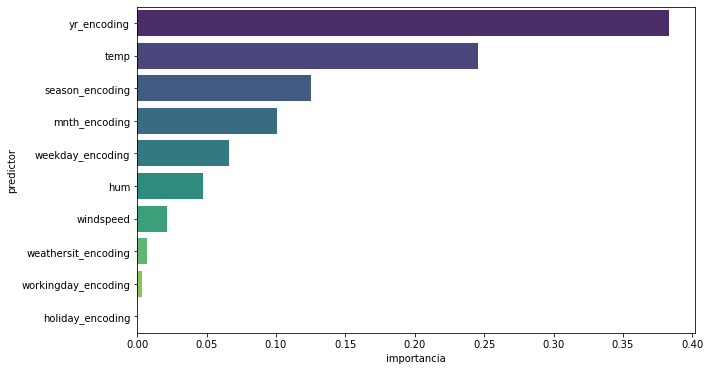

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [59]:
df_numericas = df.select_dtypes(include = np.number )

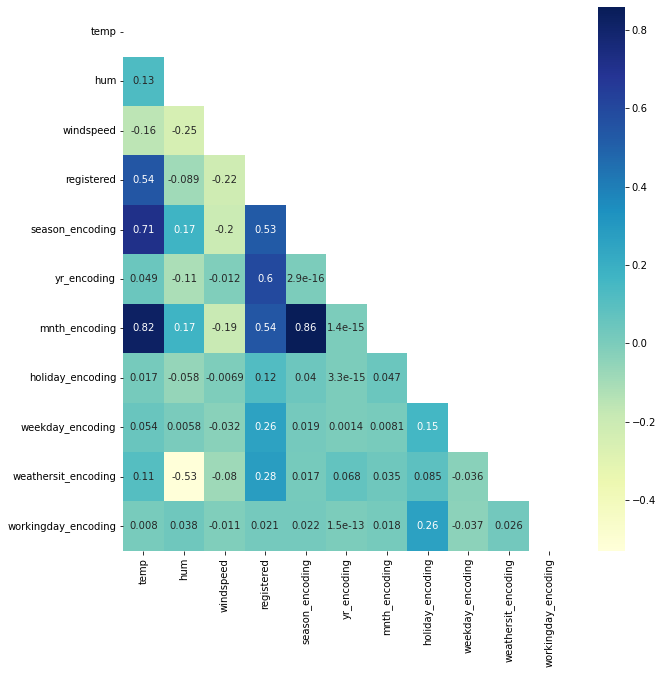

In [60]:
plt.figure(figsize= (10,10)) 
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=np.bool_))
sns.heatmap(df_numericas.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True);

In [87]:
usuarios = {"season": ["winter", "summer", "autumn", "spring", "summer"], "holiday": [0,1,0,1,1], 
            "weekday": ["Monday", "Wednesday", "Thursday", "Saturday", "Sunday"], 
            "temp": [11, 23, 14, 15, 32], "atemp": [9,26, 16, 15, 34], 
            "hum": [47, 30, 35, 20,22], "windspeed":  [15, 14, 20, 25, 3], "yr":[1,1,1,0,0], 
            "mnth":[3,7, 10, 4,8], 
            "workingday": [0, 1, 1, 0, 0], "weathersit":[2,1,3,1,2]}
df_usuarios = pd.DataFrame(usuarios, index = [0, 1, 2, 3, 4])
df_usuarios

,season,holiday,weekday,temp,atemp,hum,windspeed,yr,mnth,workingday,weathersit
0,winter,0,Monday,11,9,47,15,1,3,0,2
1,summer,1,Wednesday,23,26,30,14,1,7,1,1
2,autumn,0,Thursday,14,16,35,20,1,10,1,3
3,spring,1,Saturday,15,15,20,25,0,4,0,1
4,summer,1,Sunday,32,34,22,3,0,8,0,2


In [88]:
df_usuarios.drop("atemp", axis = 1, inplace= True)

In [89]:
df_usu_num = df_usuarios.filter(['temp', 'hum', 'windspeed'])
df_usu_num

,temp,hum,windspeed
0,11,47,15
1,23,30,14
2,14,35,20
3,15,20,25
4,32,22,3


In [90]:
# para entrenar el robust

df_bikes_tests = pd.read_csv("datos/bikes_EDA.csv", index_col=0)
df_bikes_tests.head(6)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,14.110847,80.5833,10.749882,654
1,2018-01-02,winter,0,1,0,Tuesday,1,2,14.902598,69.6087,16.652113,670
2,2018-01-03,winter,0,1,0,Wednesday,1,1,8.050924,43.7273,16.636703,1229
3,2018-01-04,winter,0,1,0,Thursday,1,1,8.200000,59.0435,10.739832,1454
4,2018-01-05,winter,0,1,0,Friday,1,1,9.305237,43.6957,12.522300,1518
5,2018-01-06,winter,0,1,0,Saturday,0,1,8.378268,51.8261,6.000868,1518


In [91]:
df_numericas = df_bikes_tests.filter(['temp', 'hum', 'windspeed'])
df_numericas

,temp,hum,windspeed
0,14.110847,80.5833,10.749882
1,14.902598,69.6087,16.652113
2,8.050924,43.7273,16.636703
3,8.200000,59.0435,10.739832
4,9.305237,43.6957,12.522300
...,...,...,...
725,10.420847,65.2917,23.458911
726,10.386653,59.0000,10.416557
727,10.386653,75.2917,8.333661
728,10.489153,48.3333,23.500518


In [92]:
robust = RobustScaler()
robust.fit(df_numericas)
df_usu_num_est = pd.DataFrame(robust.transform(df_usu_num), columns = df_usu_num.columns)
df_usu_num_est

,temp,hum,windspeed
0,-0.724311,-0.744417,0.436619
1,0.193911,-1.554343,0.284735
2,-0.494756,-1.316130,1.196043
3,-0.418237,-2.030770,1.955467
4,0.882578,-1.935485,-1.385998


In [93]:
df_usuarios[df_usu_num_est.columns] = df_usu_num_est
df_usuarios

,season,holiday,weekday,temp,hum,windspeed,yr,mnth,workingday,weathersit
0,winter,0,Monday,-0.724311,-0.744417,0.436619,1,3,0,2
1,summer,1,Wednesday,0.193911,-1.554343,0.284735,1,7,1,1
2,autumn,0,Thursday,-0.494756,-1.316130,1.196043,1,10,1,3
3,spring,1,Saturday,-0.418237,-2.030770,1.955467,0,4,0,1
4,summer,1,Sunday,0.882578,-1.935485,-1.385998,0,8,0,2


In [94]:
df_usuarios["season_encoding"] = df_usuarios["season"].map({"winter": 1, "autumn": 1.760, "spring": 1.710, "summer": 1.955})
df_usuarios['yr_encoding'] = df_usuarios['yr'].map({0:1, 1:1.682})
df_usuarios['mnth_encoding'] = df_usuarios['mnth'].map({1:1, 2: 1.213, 3: 1.501, 4:1.751, 5:2.086, 6:2.291, 7: 2.171, 8:2.272, 9:2.318, 10:2.137, 11:1.835, 12:1.541})
df_usuarios['holiday_encoding'] = df_usuarios['holiday'].map({0:1.418, 1:1})
df_usuarios['weekday_encoding'] = df_usuarios['weekday'].map({'Monday':1, 'Tuesday':1.137, 'Wednesday':1.309, 'Thursday':1.409, 'Friday':1.380, 'Saturday':1.353, 'Sunday':1.201})
df_usuarios['weathersit_encoding'] = df_usuarios['weathersit'].map({1:2.419, 2:2.074, 3:1})
df_usuarios['workingday_encoding'] = df_usuarios['workingday'].map({0:1, 1:1.019})

In [95]:
df_usuarios

,season,holiday,weekday,temp,hum,windspeed,yr,mnth,workingday,weathersit,season_encoding,yr_encoding,mnth_encoding,holiday_encoding,weekday_encoding,weathersit_encoding,workingday_encoding
0,winter,0,Monday,-0.724311,-0.744417,0.436619,1,3,0,2,1.000,1.682,1.501,1.418,1.000,2.074,1.000
1,summer,1,Wednesday,0.193911,-1.554343,0.284735,1,7,1,1,1.955,1.682,2.171,1.000,1.309,2.419,1.019
2,autumn,0,Thursday,-0.494756,-1.316130,1.196043,1,10,1,3,1.760,1.682,2.137,1.418,1.409,1.000,1.019
3,spring,1,Saturday,-0.418237,-2.030770,1.955467,0,4,0,1,1.710,1.000,1.751,1.000,1.353,2.419,1.000
4,summer,1,Sunday,0.882578,-1.935485,-1.385998,0,8,0,2,1.955,1.000,2.272,1.000,1.201,2.074,1.000


In [96]:
df_usuarios.drop(columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], inplace=True)

In [98]:
predicciones_registered = pd.DataFrame(bosque2.predict(df_usuarios))
predicciones_registered.rename(columns={0:"usuarios_registered"}, inplace = True)
predicciones_registered

,usuarios_registered
0,2561.565541
1,6233.379222
2,4718.601077
3,2164.598341
4,3594.055549


In [100]:
df_usuarios["predicciones_registered"] = round(predicciones_registered, 3)

In [101]:
df_usuarios

,temp,hum,windspeed,season_encoding,yr_encoding,mnth_encoding,holiday_encoding,weekday_encoding,weathersit_encoding,workingday_encoding,predicciones_registered
0,-0.724311,-0.744417,0.436619,1.000,1.682,1.501,1.418,1.000,2.074,1.000,2561.566
1,0.193911,-1.554343,0.284735,1.955,1.682,2.171,1.000,1.309,2.419,1.019,6233.379
2,-0.494756,-1.316130,1.196043,1.760,1.682,2.137,1.418,1.409,1.000,1.019,4718.601
3,-0.418237,-2.030770,1.955467,1.710,1.000,1.751,1.000,1.353,2.419,1.000,2164.598
4,0.882578,-1.935485,-1.385998,1.955,1.000,2.272,1.000,1.201,2.074,1.000,3594.056


In [102]:
predicciones_registered.to_csv("datos/predicciones_registered.csv")
df_usuarios.to_csv("datos/usuarios_prediccion.csv")

In [ ]:
df_